In [15]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
df=pd.read_csv('creditcard.csv')
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [3]:
df.shape

(284807, 31)

In [31]:
df.groupby(['Class']).describe(percentiles=[0.1,0.25,0.75,0.90])

Time                                                                \
          count          mean           std    min      10%      25%      50%   
Class                                                                           
0      284315.0  94838.202258  47484.015786    0.0  35047.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  20043.1  41241.5  75568.5   

                                           V1                                \
            75%       90%       max     count      mean       std       min   
Class                                                                         
0      139333.0  157652.6  172792.0  284315.0  0.008258  1.929814 -56.40751   
1      128483.0  152029.6  170348.0     492.0 -4.771948  6.783687 -30.55238   

                                                                          V2  \
             10%       25%       50%       75%       90%       max     count   
Class                                                                          
0      -1.884724 -0.917544  0.020023  1.316218  2.015758  2.454930  284315.0   
1     -14.945774 -6.036063 -2.342497 -0.419200  1.075235  2.132386     492.0   

                                                                              \
           mean       std        min       10%       25%       50%       75%   
Class                                                                          
0     -0.006271  1.636146 -72.715728 -1.360605 -0.599473  0.064070  0.800446   
1      3.623778  4.291216  -8.402154 -0.068747  1.188226  2.717869  4.971257   

                                  V3                                 \
            90%        max     count      mean       std        min   
Class                                                                 
0      1.320179  18.902453  284315.0  0.012171  1.459429 -48.325589   
1      8.769722  22.057729     492.0 -7.033281  7.110937 -31.103685   

                                                                          V4  \
             10%       25%       50%       75%       90%       max     count   
Class                                                                          
0      -1.795001 -0.884541  0.182158  1.028372  1.676905  9.382558  284315.0   
1     -18.642099 -8.643489 -5.075257 -2.276185 -0.497806  2.250210     492.0   

                                                                             \
           mean       std       min       10%       25%       50%       75%   
Class                                                                         
0     -0.007860  1.399333 -5.683171 -1.657575 -0.850077 -0.022405  0.737624   
1      4.542029  2.873318 -1.313275  1.089427  2.373050  4.177147  6.348729   

                                  V5                                  \
            90%        max     count      mean       std         min   
Class                                                                  
0      1.473013  16.875344  284315.0  0.005453  1.356952 -113.743307   
1      8.424878  12.114672     492.0 -3.151225  5.372468  -22.105532   

                                                                           V6  \
             10%       25%       50%       75%       90%        max     count   
Class                                                                           
0      -1.297756 -0.689398 -0.053457  0.612181  1.408047  34.801666  284315.0   
1     -11.416118 -4.792835 -1.522962  0.214562  1.401651  11.095089     492.0   

                                                                              \
           mean       std        min       10%       25%       50%       75%   
Class                                                                          
0      0.002419  1.329913 -26.160506 -1.164627 -0.766847 -0.273123  0.399619   
1     -1.397737  1.858124  -6.406267 -3.578782 -2.501511 -1.424616 -0.413216   

                                  V7                                 \
            90%

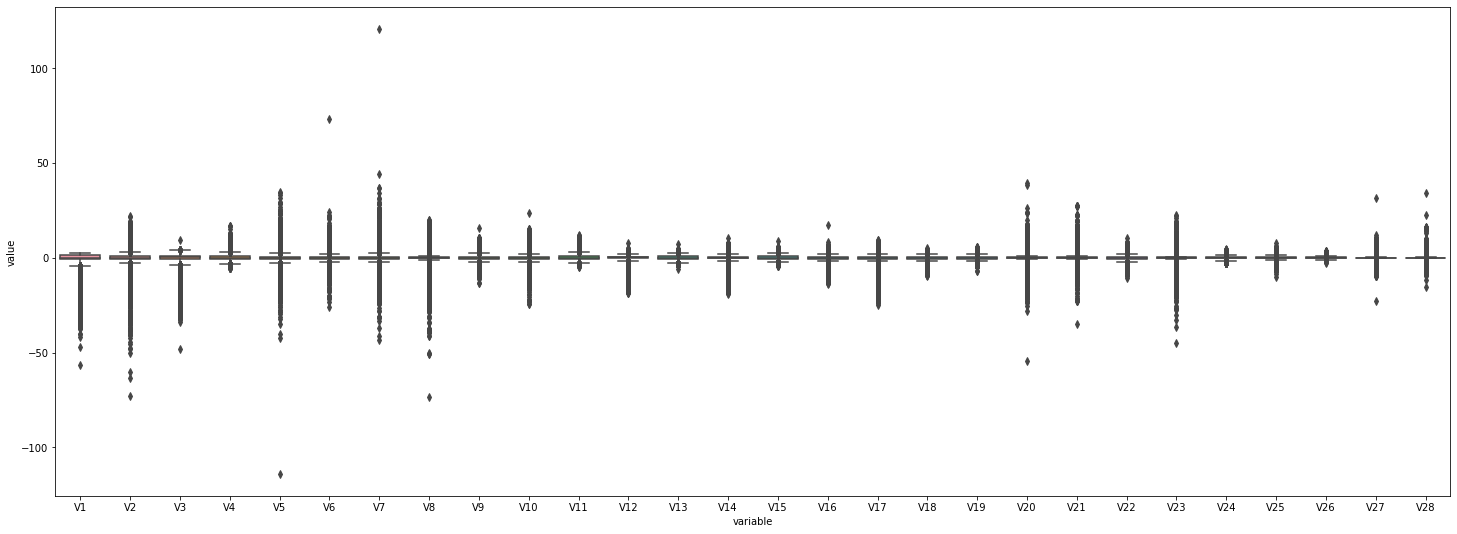

In [21]:
plt.figure(figsize=(25,9))
sns.boxplot(x="variable", y="value", data=pd.melt(df.drop(['Time','Class','Amount'],axis=1)))

In [32]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [46]:
X=df[[c for c in df.columns if c!= 'Class']]
y=df[['Class']]

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

In [47]:
X_train.shape,X_val.shape

((227845, 30), (56962, 30))

In [48]:
mean_=np.mean(X_train,axis=0)
std_=np.std(X_train,axis=0)

X_train=(X_train-mean_)/std_
X_val=(X_val-mean_)/std_

In [51]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
__________________________________________________

In [68]:
weight_for_0=1/y_train.value_counts().values[0]
weight_for_1=1/y_train.value_counts().values[1]

In [74]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)


model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    #filepath='fraud_model_at_epoch_{epoch}.h5',
    save_weights_only=True,
    monitor='val_recall',
    mode='max',
    save_best_only=True)

class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    X_train,
    y_train,
    batch_size=2048,
    epochs=30,
    verbose=2,
    callbacks=model_checkpoint_callback,
    validation_data=(X_val, y_val),
    class_weight=class_weight
)

Epoch 1/30
112/112 - 2s - loss: 4.8754e-07 - precision: 0.1234 - recall: 0.9948 - val_loss: 0.0723 - val_precision: 0.1481 - val_recall: 0.8857
Epoch 2/30
112/112 - 1s - loss: 3.6568e-07 - precision: 0.1368 - recall: 0.9948 - val_loss: 0.0636 - val_precision: 0.0836 - val_recall: 0.8857
Epoch 3/30
112/112 - 1s - loss: 3.7573e-07 - precision: 0.1403 - recall: 0.9974 - val_loss: 0.0515 - val_precision: 0.1540 - val_recall: 0.8857
Epoch 4/30
112/112 - 1s - loss: 3.6785e-07 - precision: 0.1719 - recall: 0.9948 - val_loss: 0.1018 - val_precision: 0.1888 - val_recall: 0.8667
Epoch 5/30
112/112 - 1s - loss: 3.2240e-07 - precision: 0.1781 - recall: 0.9974 - val_loss: 0.0315 - val_precision: 0.1746 - val_recall: 0.8762
Epoch 6/30
112/112 - 1s - loss: 2.9634e-07 - precision: 0.1257 - recall: 0.9948 - val_loss: 0.0442 - val_precision: 0.1250 - val_recall: 0.8952
Epoch 7/30
112/112 - 1s - loss: 1.9993e-07 - precision: 0.1576 - recall: 1.0000 - val_loss: 0.0381 - val_precision: 0.1359 - val_recall: